Video: https://drive.google.com/file/d/1UoCEMiLoAZZfxknDpL4cW82p5n8IyZ18/view?usp=sharing

# COGS 108 - Big Mac Economics

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Overview

In this project, we analyzed the correlation between the price of a Big Mac and a country's economic status measured through its GDP per capita, median household income, poverty rate, unemployment rate, minimum wage, population, area, and density. We began by cleaning several datasets and combine them into one for ease of anaylzing. By creating several charts exploring the data, we were able to get a better visual idea of the relationship between price and our other variables, which we then mathematically determined through a ordinary least squares linear regressions. Our analysis determined that there is a positive correlation between the price of a Big Mac and GDP per capita, median household income, and minimum wage, while no correlation for poverty rate, unemployment rate, population, area, and density.

# Names

- Dawson Do
- Adrian Castaneda
- Gokul Rasmi
- Jenny Song
- Samay Gandhi

<a id='research_question'></a>
# Research Question

What is the correlation between the price of a Big Mac in a country to its economic status measured by its GDP per capita, median household income, poverty rate, unemployment rate, minimum wage, population, area, and density.

<a id='background'></a>

## Background & Prior Work

McDonald’s is a name nearly every person can recognize, as it is the biggest fast food chain in the world [1]. We wanted to explore the spread of the economic influences of McDonald's across the world and its effect on the world economy. Our personal interest in this research came about after the craze behind McDonald’s x BTS collab which brought together different world cultures and caused lines outside stores for BTS collab special sweet chili and cajun dips which were reportedly resold for up to 500 dollars from their normal resale of around 10 dollars. Despite every country’s McDonalds offering a different menu they almost all offer the Big Mac. With the burger being so ubiquitous, the value of each country’s currency can be easily associated with it.

Traditionally, foreign exchange rates, measures of purchasing power, are determined by several factors including, gross domestic product, the consumer price index, producer price index, employment data, and interest rates [2]. Using these criteria to compare countries is useful and efficient because all relate to purchasing power within a country and almost every country has this corresponding data available. For example, water is one such item almost universally available and has had plenty of studies showing how its price reflects aspects of a country’s economy. In short, water scarce countries (with significantly higher water prices) are indicative of an economically weaker country [3][4]. Looking at another widely available product, almost every country has McDonald's that sells Big Macs. Since the Big Mac is such a common fast food item across the world, its price could be used to provide insights on a country's relative purchasing power just like with water. In 1986, The Economist coined the “Big Mac Index'' and did just this. They used the Big Mac to measure the disparities in consumer purchasing power between nations, concluding that the Big Mac Index is actually roughly accurate [5]. With this prior work, we wanted to take a step further and see if the price of a Big Mac can also measure differences in economic status such as median household income, GDP per capita, poverty rate, and unemployment rate.

References (include links):
1. McDowell, Erin. “Then and Now: Photos Show How Mcdonald's Has Changed through the Years, from Its Menu to Its Mascot.” Business Insider. Business Insider, February 10, 2020. https://www.businessinsider.com/then-and-now-mcdonalds-restaurants-through-the-years.
2. Segal, Troy. “What Is the Big Mac Index?” Investopedia. Investopedia, January 10, 2020. https://www.investopedia.com/ask/answers/09/big-mac-index.asp.
3. Hallman, Carly. “The Affordability of Water around the World.” TitleMax, 14 Dec. 2021, https://www.titlemax.com/discovery-center/money-finance/affordability-of-water-around-the-world/.
4. “Water & the Economy.” Water.org, https://water.org/our-impact/water-crisis/economic-crisis/.
5. Beers, Brian. “What Indicators Are Used in Exchange Rate Forecasting?” Investopedia. Investopedia, September 13, 2021. https://www.investopedia.com/ask/answers/021715/what-economic-indicators-are-most-used-when-forecasting-exchange-rate.asp.

# Hypothesis


We hypothesize that the adjusted relative price (price in US dollars) of a Big Mac will be a positive predictor of GDP per capita, median household income, and minimum wage since higher demand increases both prices and GDP while median household income, minimum wage, and prices can both be increased by inflation. We hypothesize that the adjusted relative price of a Big Mac will be a weak negative predictor of poverty rate and unemployment rate as McDonald’s may want to lower their prices as poverty rate and unemployment increases to increase demand with lower disposable income. However, we do not believe that poverty and unemployment rate will be as strongly correlated with the adjusted relative price of a Big Mac as GDP per capita and median household income. Similarly, we hypothesize the adjusted relative price of a Big Mac will have a weak to no correlation with population, area, and density. Although these factors may influence demand, it is likely that effect is minor.

# Dataset(s)

Dataset Name: Big Mac Economic Index
- Link to the dataset: https://www.kaggle.com/yamqwe/the-big-mac-economic-index 
- Number of observations: 812
- This data set is our base dataset for comparison by countries of the world. The data set contains the country, Big Mac price, currency exchange rate, and adjusted price (into US dollars) for several years. An observation represents a country with its respective attributes.

Dataset Name: Median Household Income and GDP per Capita by Country
- Link to the dataset: https://worldpopulationreview.com/country-rankings/median-income-by-country 
- Number of observations: 162
- This data set contains the country, median household income, and GDP per capita, which will be joined to our base data set by country. An observation represents a country with its respective attributes.

Dataset Name: Unemployment Rate by Country
- Link to the dataset: https://worldpopulationreview.com/country-rankings/unemployment-by-country 
- Number of observations: 219
- This data set contains the country and its unemployment rate, which will be joined to our base data set by country. An observation represents a country with its respective attributes.

Dataset Name: Poverty Rate by Country
- Link to the dataset: https://worldpopulationreview.com/country-rankings/poverty-rate-by-country 
- Number of observations: 172
- This data set contains the country and its poverty rate, which will be joined to our base data set by country. An observation represents a country with its respective attributes.

Dataset Name: Minimum Wage by Country
- Link to the dataset: https://stats.oecd.org/Index.aspx?DataSetCode=RMW
- Number of observations: 201
- This data set contains the country and its annual minimum wage, which will be joined to our base data set by country. An observation represents a country with its respective attributes.

Dataset Name: Population by Country
- Link to the dataset: https://worldpopulationreview.com/countries
- Number of observations: 205
- This data set contains the country and its population, area, and density, which will be joined to our base data set by country. An observation represents a country with its respective attributes.

# Setup

We need to import all necessary packages and datasets.

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
bm_df = pd.read_csv("./data/big-mac-adjusted-index.csv")
mi_df = pd.read_csv("./data/medianIncome.csv")
pr_df = pd.read_csv("./data/povertyRate.csv")
ur_df = pd.read_csv("./data/unemploymentRate.csv")
mw_df = pd.read_csv("./data/minimum_wage.csv")
pop_df = pd.read_csv("./data/population.csv")

# Data Cleaning

To get an idea of what our base data set looks like, we printed the first few rows.

In [3]:
bm_df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


Knowing what the different variables denote, we selected only the variables we want to work with: the date, name of country, and its adjusted Big Mac price (Big Mac price in year adjusted US dollars).

In [4]:
bm_df = bm_df[['date','name','adj_price']]
bm_df

,date,name,adj_price
0,2011-07-01,Argentina,3.149757
1,2011-07-01,Australia,5.792526
2,2011-07-01,Brazil,3.245241
3,2011-07-01,Britain,4.684831
4,2011-07-01,Canada,5.259173
...,...,...,...
807,2021-07-01,Ukraine,3.063007
808,2021-07-01,United Arab Emirates,4.183747
809,2021-07-01,United States,5.427311
810,2021-07-01,Uruguay,3.542683


We want to check if we have any missing values in our data column.

In [5]:
sum(bm_df['date'].isnull())

0

After seeing none, we extracted the year from the date column as it is the only thing we are interested in. We then filter for the most recent year with complete data, 2021.

In [6]:
bm_df['year'] = pd.to_datetime(bm_df['date']).dt.year
bm_df = bm_df.loc[(bm_df['year'] == 2021)]
bm_df = bm_df.reset_index()

To make reading and understanding our data set a bit easier, we renamed our variables to be a bit more clear.

In [7]:
bm_df = bm_df[['name','adj_price']]
bm_df = bm_df.rename(columns={'name':'country','adj_price':'price'})
bm_df

,country,price
0,Argentina,3.263744
1,Australia,5.057862
2,Azerbaijan,3.058874
3,Bahrain,3.913760
4,Brazil,3.217782
...,...,...
105,Ukraine,3.063007
106,United Arab Emirates,4.183747
107,United States,5.427311
108,Uruguay,3.542683


We realized that there were actually two entries for the year 2021 and we only need one, so we filtered out the other half. 

In [8]:
bm_df = bm_df.iloc[:55]

To match up with our other data sets, we need to rename `England` to `United Kingdom`

In [9]:
bm_df.iloc[5,0] = 'United Kingdom'
bm_df.iloc[5]

country    United Kingdom
price            4.574823
Name: 5, dtype: object

Now that we believe to have cleaned up our data, we check for any null values to make sure we are in the clear.

In [10]:
bm_df.isnull().sum()

country    0
price      0
dtype: int64

Now that we have one clean and tidy data set, we take a look at our median income and GDP per capita data set.

In [11]:
mi_df.head()

,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2022
0,Luxembourg,26321,31376,124590,642.371
1,United Arab Emirates,24292,27017,70089,10081.785
2,Norway,22684,25272,70005,5511.370
3,Switzerland,21490,25787,72376,8773.637
4,United States,19306,25332,65297,334805.269


We select only the variables we are interested in: country, median income, and gdp per capita.

In [12]:
mi_df = mi_df[['country','medianIncome','gdpPerCapitaPPP']]
mi_df

,country,medianIncome,gdpPerCapitaPPP
0,Luxembourg,26321,124590
1,United Arab Emirates,24292,70089
2,Norway,22684,70005
3,Switzerland,21490,72376
4,United States,19306,65297
...,...,...,...
157,Burundi,475,784
158,Madagascar,398,1719
159,DR Congo,395,1146
160,India,0,6996


Check for null values.

In [13]:
mi_df.isnull().sum()

country            0
medianIncome       0
gdpPerCapitaPPP    0
dtype: int64

Now that we have cleaned and tidied this data set, we take a look at our poverty rate data set.

In [14]:
pr_df.head()

,country,percPoverty,dataYear,lessThan10,lessThan550
0,Equatorial Guinea,76.8,2006,NaN,NaN
1,South Sudan,76.4,2016,99.70,98.44
2,Madagascar,70.7,2012,99.41,97.09
3,Guinea-Bissau,69.3,2010,96.56,92.21
4,Eritrea,69.0,1993,NaN,NaN


Similar to our previous data sets, we selected desired columns, checked and dropped nulls, renamed variables for readability and convenience of the merging process that we will perform later.

In [15]:
pr_df = pr_df[['country','percPoverty']]
pr_df = pr_df.rename(columns={'percPoverty':'povertyRate'})
pr_df

,country,povertyRate
0,Equatorial Guinea,76.8
1,South Sudan,76.4
2,Madagascar,70.7
3,Guinea-Bissau,69.3
4,Eritrea,69.0
...,...,...
167,United Arab Emirates,NaN
168,Somalia,NaN
169,Taiwan,NaN
170,South Korea,NaN


In [16]:
pr_df.isnull().sum()

country         0
povertyRate    13
dtype: int64

In [17]:
pr_df = pr_df.dropna()

We, again, performed a similar process for our unemployment data set.

In [18]:
ur_df.head()

,country,rateWb,yearWb,rateIlo,yearIlo,rateCia,yearCia
0,South Africa,29.2,2020,29.2,2020.0,28.53,2019.0
1,Djibouti,26.1,2017,26.1,2017.0,40.00,2017.0
2,Equatorial Guinea,25.0,1983,NaN,NaN,8.60,2014.0
3,Botswana,24.9,2020,22.6,2019.0,20.00,2013.0
4,Grenada,22.9,2015,22.9,2015.0,24.00,2017.0


In [19]:
ur_df = ur_df[['country','rateWb']]
ur_df = ur_df.rename(columns={'rateWb':'unemploymentRate'})
ur_df

,country,unemploymentRate
0,South Africa,29.2
1,Djibouti,26.1
2,Equatorial Guinea,25.0
3,Botswana,24.9
4,Grenada,22.9
...,...,...
214,Eritrea,NaN
215,Central African Republic,NaN
216,Somalia,NaN
217,Taiwan,NaN


In [20]:
ur_df.isnull().sum()

country              0
unemploymentRate    17
dtype: int64

In [21]:
ur_df = ur_df.dropna()

Once again, performed a similar process for our minimum wage data set.

In [22]:
mw_df.head()

,Country,Annual-Nominal (US$),Annual-PPP (Int$),Workweek (hours),Hourly-Nominal (US$),Hourly-PPP (Int$),Percent of GDP per capita,Effective per
0,Afghanistan,1047.0,3272.0,40.0,0.50,1.57,168.30%,2017
1,Albania,2418.0,5218.0,40.0,1.16,2.51,45.20%,5 May 2017
2,Algeria,2163.0,6247.0,40.0,1.04,3.00,41.60%,1 May 2020
3,Andorra,14243.0,11020.0,40.0,6.85,5.30,28%,1 January 2019
4,Angola,1681.0,2108.0,44.0,0.73,0.92,32.70%,1 April 2019


In [23]:
mw_df = mw_df.rename(columns={'Country':'country','Annual-PPP (Int$)':'annualMinimumWage'})
mw_df = mw_df[['country','annualMinimumWage']]
mw_df

,country,annualMinimumWage
0,Afghanistan,3272.0
1,Albania,5218.0
2,Algeria,6247.0
3,Andorra,11020.0
4,Angola,2108.0
...,...,...
196,Venezuela,NaN
197,Vietnam,3676.0
198,Yemen,NaN
199,Zambia,3180.0


In [24]:
mw_df.isnull().sum()

country               0
annualMinimumWage    45
dtype: int64

In [25]:
mw_df = mw_df.dropna()

Finally, performed a similar process for our population data set.

In [26]:
pop_df.head()

,Rank,name,pop2022,pop2021,GrowthRate,area,Density
0,1,China,1448471.400,1444216.107,1.0029,9706961,149.2199
1,2,India,1406631.776,1393409.038,1.0095,3287590,427.8611
2,3,United States,334805.269,332915.073,1.0057,9372610,35.7217
3,4,Indonesia,279134.505,276361.783,1.0100,1904569,146.5605
4,5,Pakistan,229488.994,225199.937,1.0190,881912,260.2176


In [27]:
pop_df = pop_df.rename(columns={'name':'country','Density':'density','pop2022':'population'})
pop_df = pop_df[['country','population','area','density']]
pop_df

,country,population,area,density
0,China,1448471.400,9706961,149.2199
1,India,1406631.776,3287590,427.8611
2,United States,334805.269,9372610,35.7217
3,Indonesia,279134.505,1904569,146.5605
4,Pakistan,229488.994,881912,260.2176
...,...,...,...,...
200,San Marino,34.085,61,558.7705
201,Palau,18.233,459,39.7233
202,Tuvalu,12.066,26,464.0769
203,Nauru,10.903,21,519.1905


In [28]:
pop_df.isnull().sum()

country       0
population    0
area          0
density       0
dtype: int64

Now that all of data sets are clean and tidy, we merged them into one using a left join to ensure all countries in our Big Mac Index Data set are kept.

In [29]:
join_1 = bm_df.join(mi_df.set_index('country'), on='country', how='left')
join_2 = join_1.join(pr_df.set_index('country'), on='country', how='left')
join_3 = join_2.join(ur_df.set_index('country'), on='country', how='left')
join_4 = join_3.join(mw_df.set_index('country'), on='country', how='left')
world_join = join_4.join(pop_df.set_index('country'), on='country', how='left')

We now removed observations that do not have data for any variable besides country and price.

In [30]:
world_join.replace(0, np.nan, inplace=True)
num_rows = world_join.shape[0]
for i in range(0,num_rows):
    if world_join.loc[[i]].isna().sum().sum() > 3:
        world_join = world_join.drop([i])
        i -= 1
world_join = world_join.reset_index(drop=True)
world_join

,country,price,medianIncome,gdpPerCapitaPPP,povertyRate,unemploymentRate,annualMinimumWage,population,area,density
0,Argentina,3.263744,5319.0,NaN,35.5,11.5,28722.0,46010.234,2780400.0,16.5481
1,Australia,5.057862,17076.0,53381.0,12.4,6.5,24499.0,26068.792,7692024.0,3.3891
2,Azerbaijan,3.058874,3193.0,15041.0,6.0,4.8,8571.0,10300.205,86600.0,118.9400
3,Brazil,3.217782,4559.0,15299.0,26.5,13.7,6458.0,215353.593,8515767.0,25.2888
4,United Kingdom,4.574823,14793.0,49931.0,18.6,3.7,22672.0,68497.907,242900.0,282.0004
5,Canada,4.731931,18652.0,51668.0,11.6,9.5,20953.0,38388.419,9984670.0,3.8447
6,Chile,3.460751,6293.0,27002.0,8.6,11.2,8609.0,19250.195,756102.0,25.4598
7,China,3.279736,NaN,16829.0,0.6,5.2,3491.0,1448471.400,9706961.0,149.2199
8,Colombia,3.123826,3259.0,16012.0,35.7,15.0,9289.0,51512.762,1141748.0,45.1175
9,Costa Rica,3.358722,5457.0,21737.0,21.0,17.4,10191.0,5182.354,51100.0,101.4159


# Data Analysis & Results

Now that we have a complete dataset with all the variables that we need, we take a look at the description of our dataset to see what we're working with.

In [31]:
world_join.describe()

,price,medianIncome,gdpPerCapitaPPP,povertyRate,unemploymentRate,annualMinimumWage,population,area,density
count,51.000000,43.000000,42.000000,43.000000,50.000000,45.000000,5.100000e+01,5.100000e+01,51.000000
mean,3.727349,8320.651163,29768.595238,18.748837,6.856000,11522.488889,1.091153e+05,1.717798e+06,274.105363
std,0.850755,6634.484790,20229.336737,13.413273,5.078412,6945.986780,2.788145e+05,3.450518e+06,955.424686
min,2.919043,1399.000000,4898.000000,0.600000,1.100000,2414.000000,3.496016e+03,1.104000e+03,3.389100
25%,3.051701,3189.000000,13468.500000,10.000000,3.950000,6458.000000,9.264575e+03,8.797100e+04,30.965350
50%,3.358722,5457.000000,24758.500000,15.700000,4.900000,9289.000000,2.606879e+04,3.238020e+05,105.897200
75%,4.297760,13056.000000,43906.500000,22.850000,8.250000,15374.000000,7.782009e+04,1.181392e+06,191.594350
max,6.193289,24292.000000,72376.000000,59.300000,29.200000,28722.000000,1.448471e+06,1.709824e+07,6887.952000


To increase readability, we sort the countries in alphabetical order.

In [32]:
world_join = world_join.sort_values(by=['country'])

Before starting our analysis, let's plot the historgam of each metric to see it's distribution. <br>

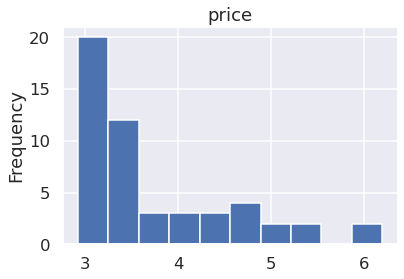

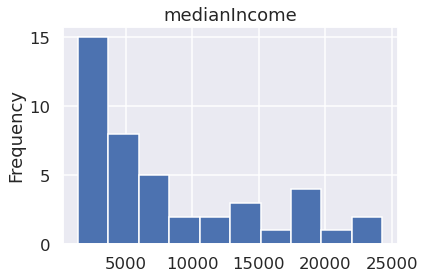

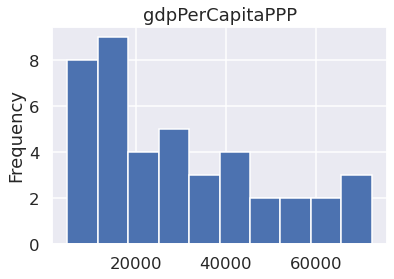

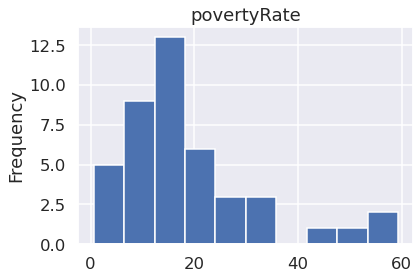

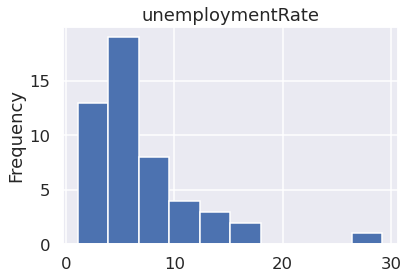

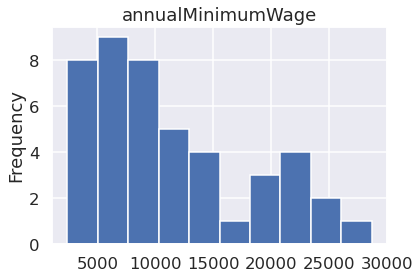

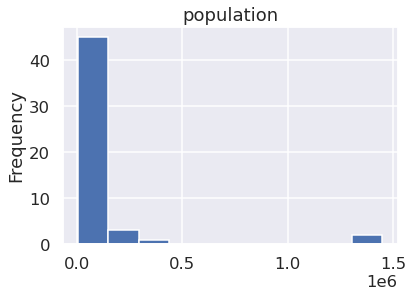

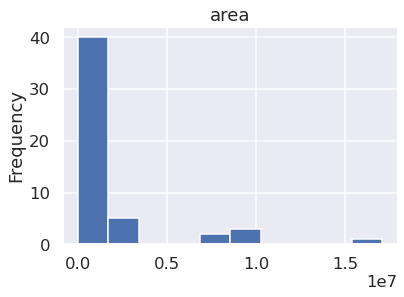

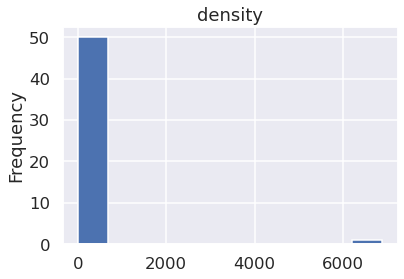

In [33]:
for col in world_join.columns:
    if col == 'country': continue
    # we don't choose bin, as each metric has varying measures
    plt.hist(world_join[col])
    plt.gca().set(title=col, ylabel='Frequency');
    plt.show()

As expected population, area and density have similar distributions and have most values towards the left with a few outliers. Other metrics are more evenly distributed but are bottom-heavy. It's nice that we can see most economic metrics have a similar distribution to the price index. We will be further exploring this to see if there is any correlation.

Here, we provided the relationship between country and each of the other variables with our interpretation of each graph.

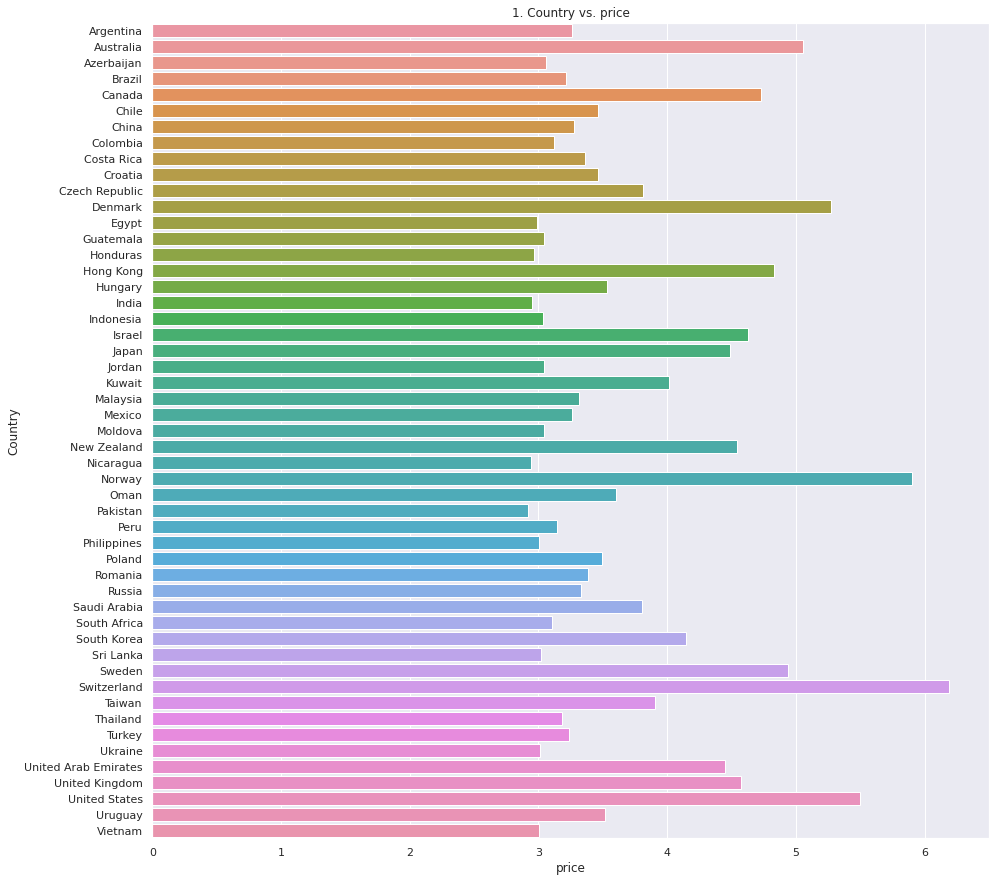

Looking at this bar graph there is a clear relation towards more developed countries having a higher Big Mac price than the lesser developed countries. While this doesn’t confirm anything for our hypothesis, as economic status is assumed in this graph based on cultural knowledge rather than quantified, it's clear that the widely considered developed countries have a higher price and hints that there is some more analysis to be done.


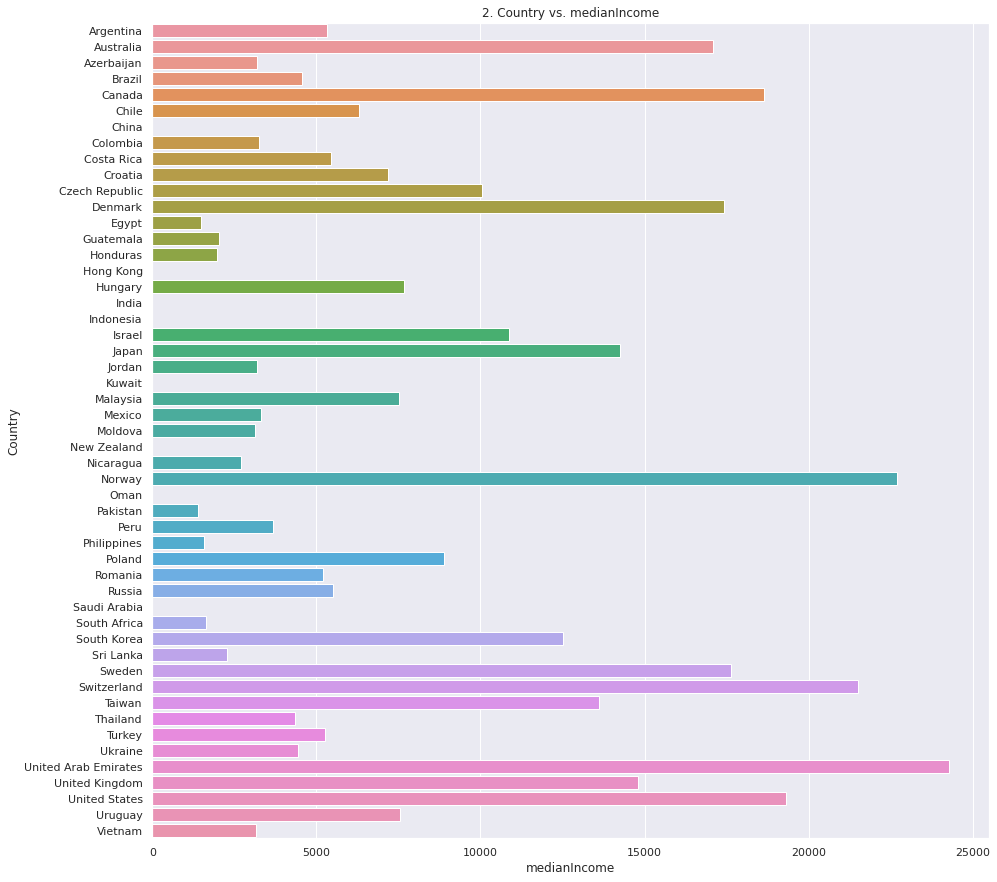

This graph shares a similar shape as the Country vs Price graph which provides backing evidence towards our hypothesis that there is a positive correlation between Big Mac prices and a country’s economic status (median income is often used as one of the indicators of a country’s economic status).


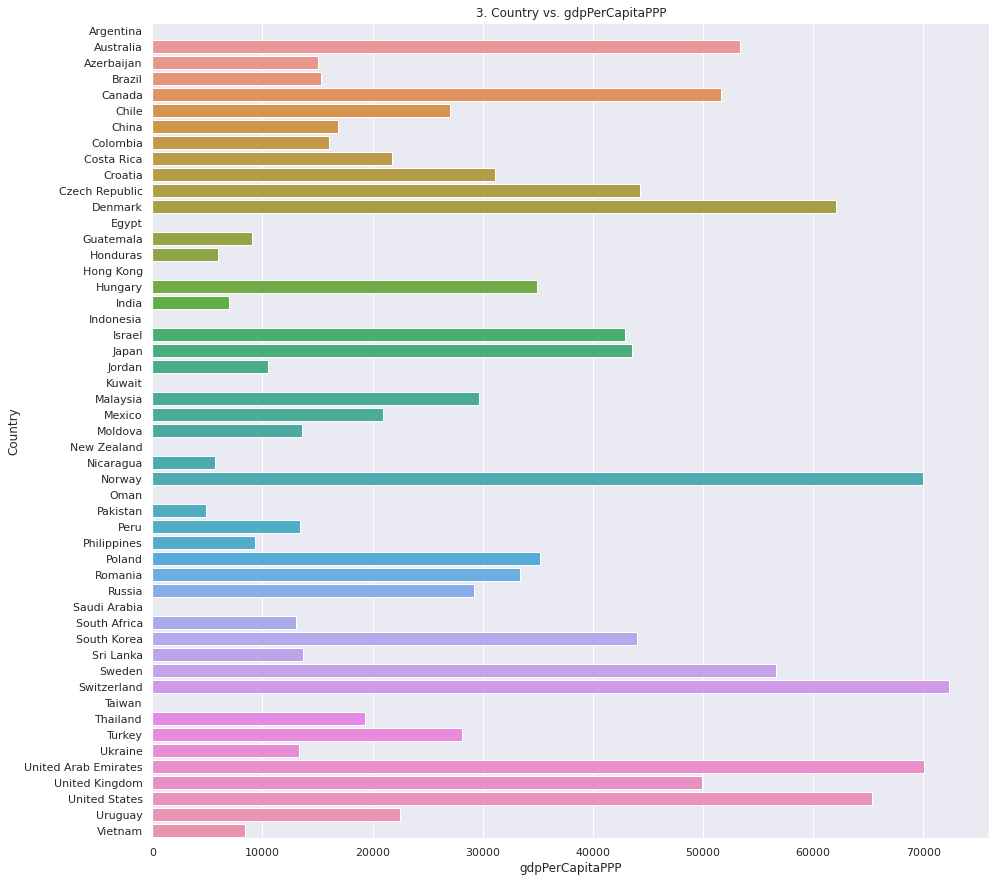

This graph relays the same story as the above graphs but with another economic indicator, GDP per Capita.


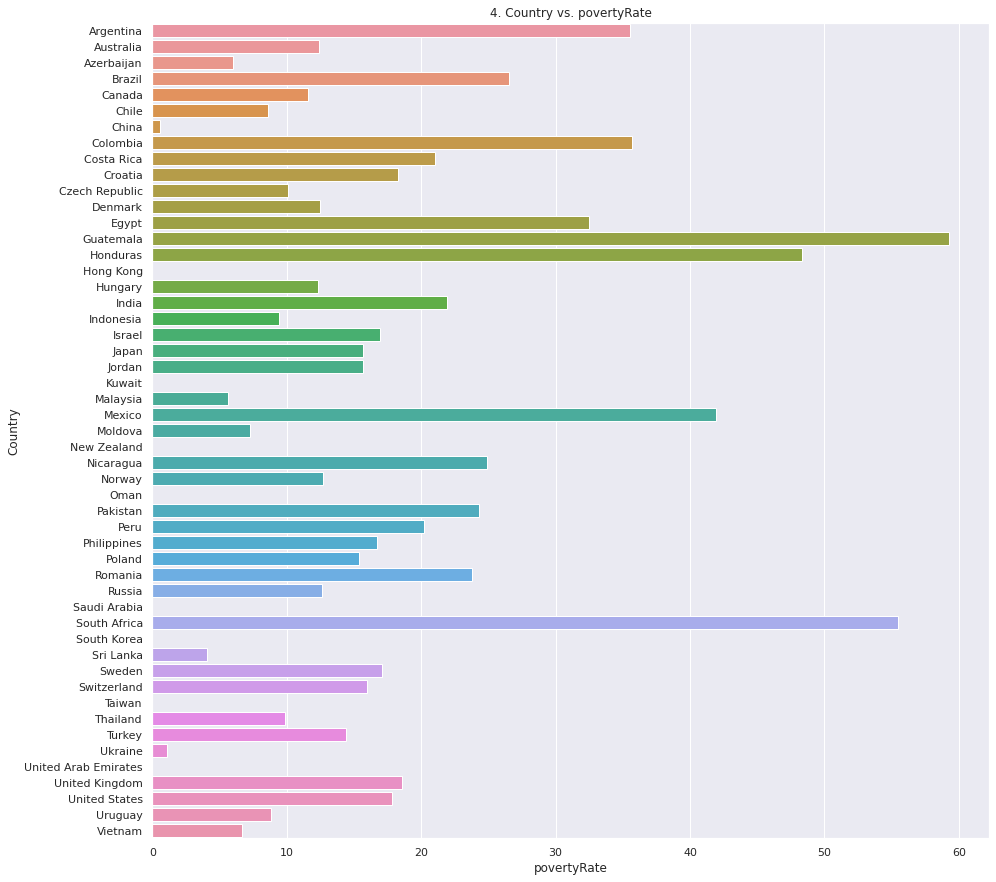

The poverty rate displays almost the inverse of the above graphs. Putting thought into it, it makes sense that a country with a higher poverty rate would have a lower GDP per Capita and Median Income. However, this may not totally support our hypothesis as there are quite a few outliers, for example South Africa has a very high poverty rate, but their Big Mac price is very similar to that of Indonesia who has a much lower poverty rate.


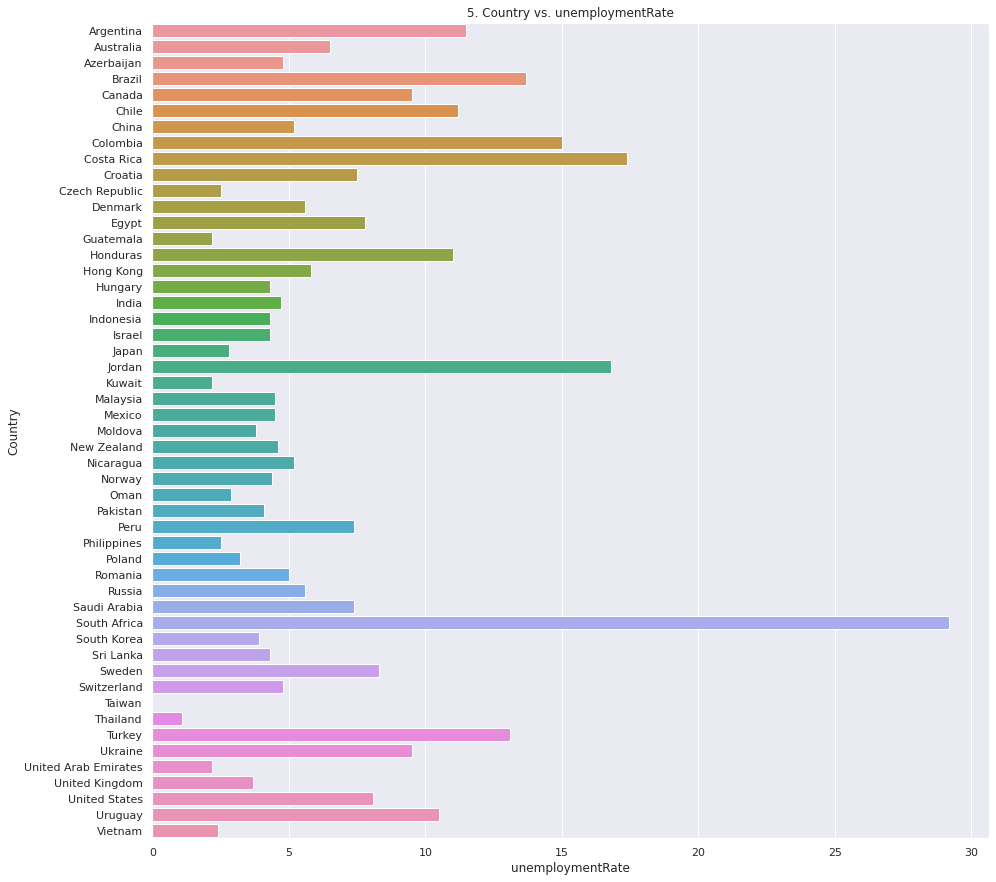

This graph more or less is a reiteration of the Country vs Poverty rate. The same examples can be applied here as they are in Country vs Poverty rate.


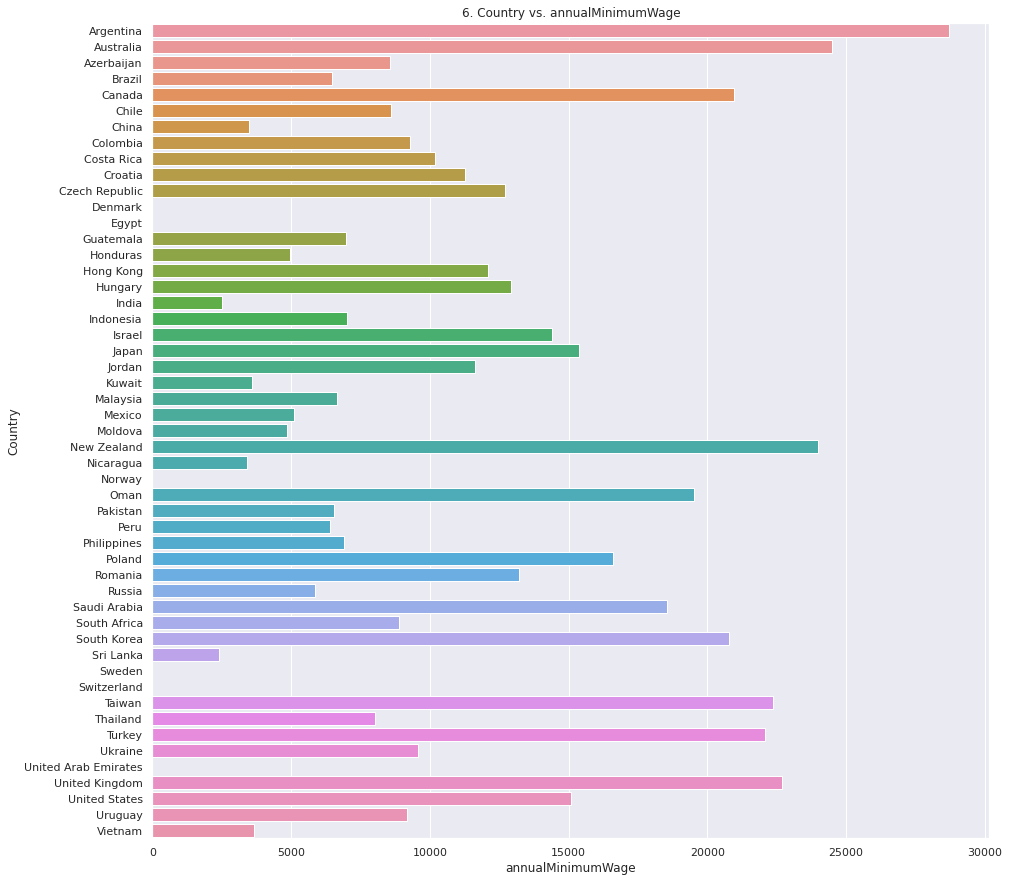

This graph is more reinforcement for the Country vs Median and Country vs GDP graphs as the same trends are apparent once comparing the graphs.


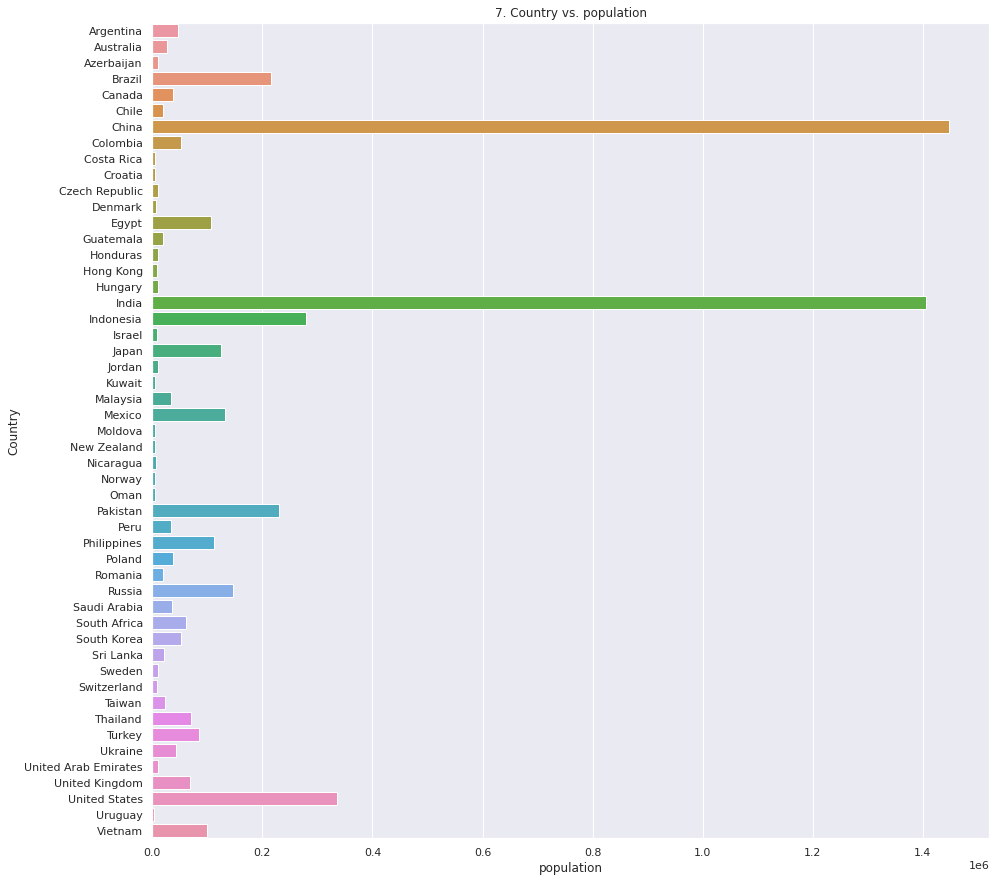

Not much information can be gained from this graph in relation to our hypothesis.


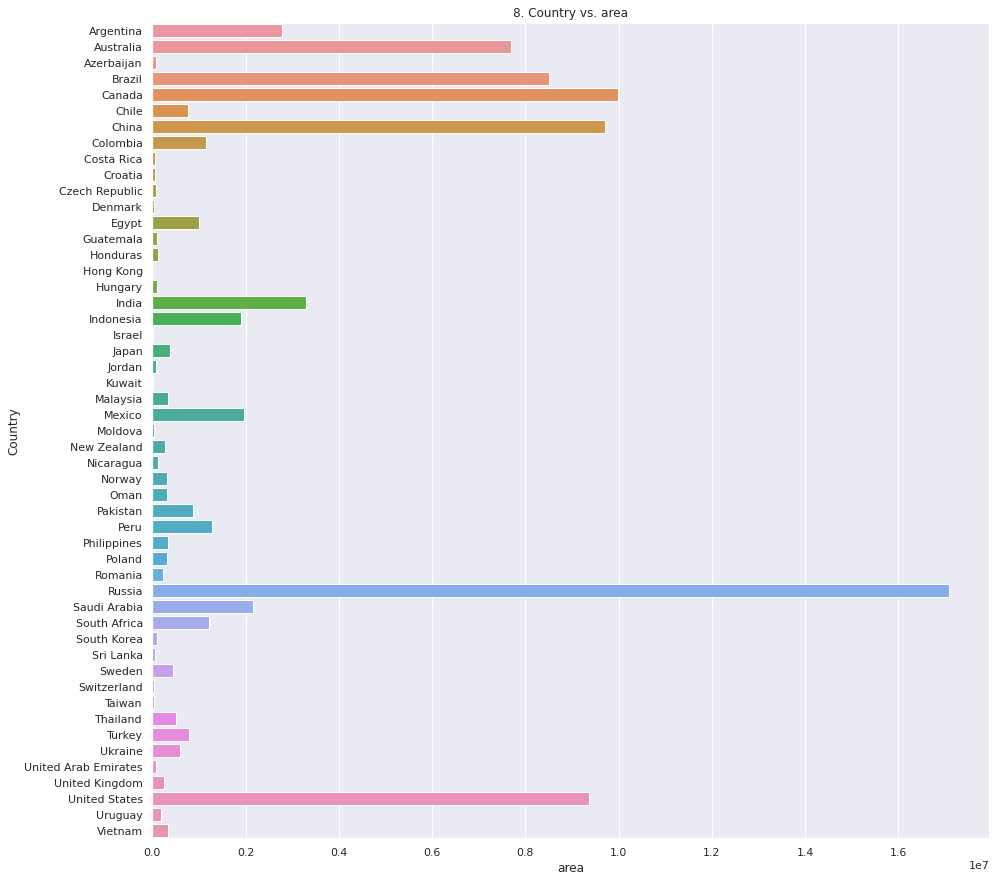

Not much information can be gained from this graph in relation to our hypothesis.


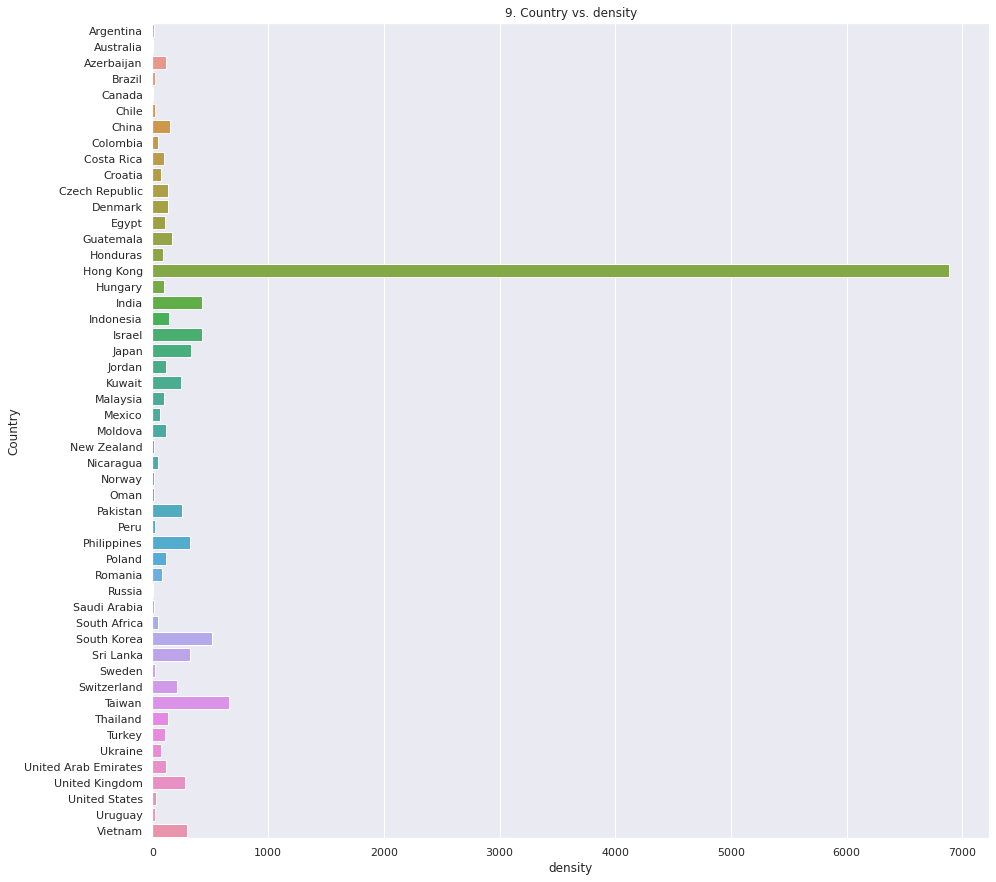

Not much information can be gained from this graph in relation to our hypothesis.


In [34]:
sns.set(rc={'figure.figsize':(15,15)})
num = 0
arr = []
arr.append("""Looking at this bar graph there is a clear relation towards more developed countries having a higher Big Mac price than the lesser developed countries. While this doesn’t confirm anything for our hypothesis, as economic status is assumed in this graph based on cultural knowledge rather than quantified, it's clear that the widely considered developed countries have a higher price and hints that there is some more analysis to be done.""")
arr.append("""This graph shares a similar shape as the Country vs Price graph which provides backing evidence towards our hypothesis that there is a positive correlation between Big Mac prices and a country’s economic status (median income is often used as one of the indicators of a country’s economic status).""")
arr.append("""This graph relays the same story as the above graphs but with another economic indicator, GDP per Capita.""")
arr.append("""The poverty rate displays almost the inverse of the above graphs. Putting thought into it, it makes sense that a country with a higher poverty rate would have a lower GDP per Capita and Median Income. However, this may not totally support our hypothesis as there are quite a few outliers, for example South Africa has a very high poverty rate, but their Big Mac price is very similar to that of Indonesia who has a much lower poverty rate.""")
arr.append("""This graph more or less is a reiteration of the Country vs Poverty rate. The same examples can be applied here as they are in Country vs Poverty rate.""")
arr.append("""This graph is more reinforcement for the Country vs Median and Country vs GDP graphs as the same trends are apparent once comparing the graphs.""")
arr.append("""Not much information can be gained from this graph in relation to our hypothesis.""")
arr.append("""Not much information can be gained from this graph in relation to our hypothesis.""")
arr.append("""Not much information can be gained from this graph in relation to our hypothesis.""")
for col in world_join.columns:
    if col == 'country': continue
    num += 1
    ax = sns.barplot(x=col, y="country", data=world_join)
    ax.set(xlabel=col, ylabel='Country', title=f'{num}. Country vs. {col}')
    plt.show()
    print(arr[num-1])

Based on the bar graphs overall, it's evident that a higher Median Income, GDP per Capita, and Annual Minimum Wages are indicative towards a higher Big Mac price compared to other countries.

A scatter matrix can also help us gain more insight into the relationship between different variables.

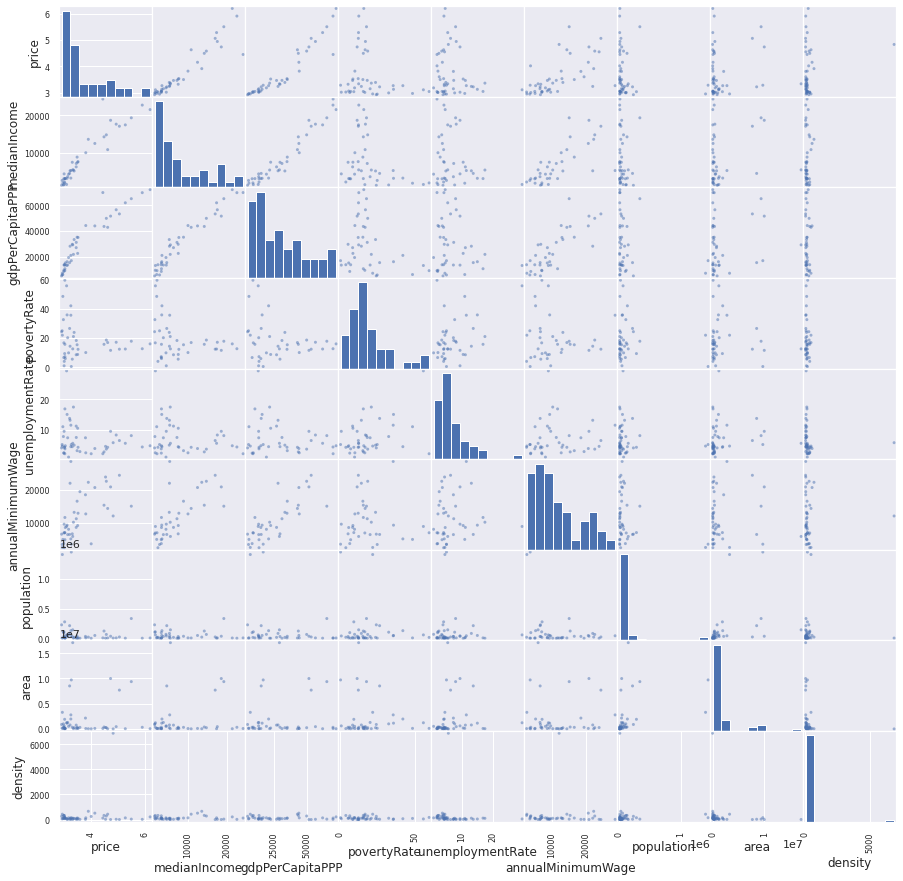

In [35]:
fig = pd.plotting.scatter_matrix(world_join.drop(columns=['country']))

There’s a strong positive correlation between Price & Median Income and Price & GDP Per capita. However, both graphs tend to have a different trend when median income or GDP per capita reaches a specific amount (around 11000 for median income and 42000 for GDP per capita). So if a country’s median income or GDP per capita is well above average, it has a larger influence on the price of Big Mac. 

Since we are looking at whether the price of Big Mac is correlated to the different measurements of economic status, we generated some scatterplots to visualize the realtionship between Big Mac price and each of our related variables, again with our observation below each graph. <br>
Legend for the scatter plots below is here (for better readibility of plots):
![Legend for scatter plots](img/scatter_legend.png)

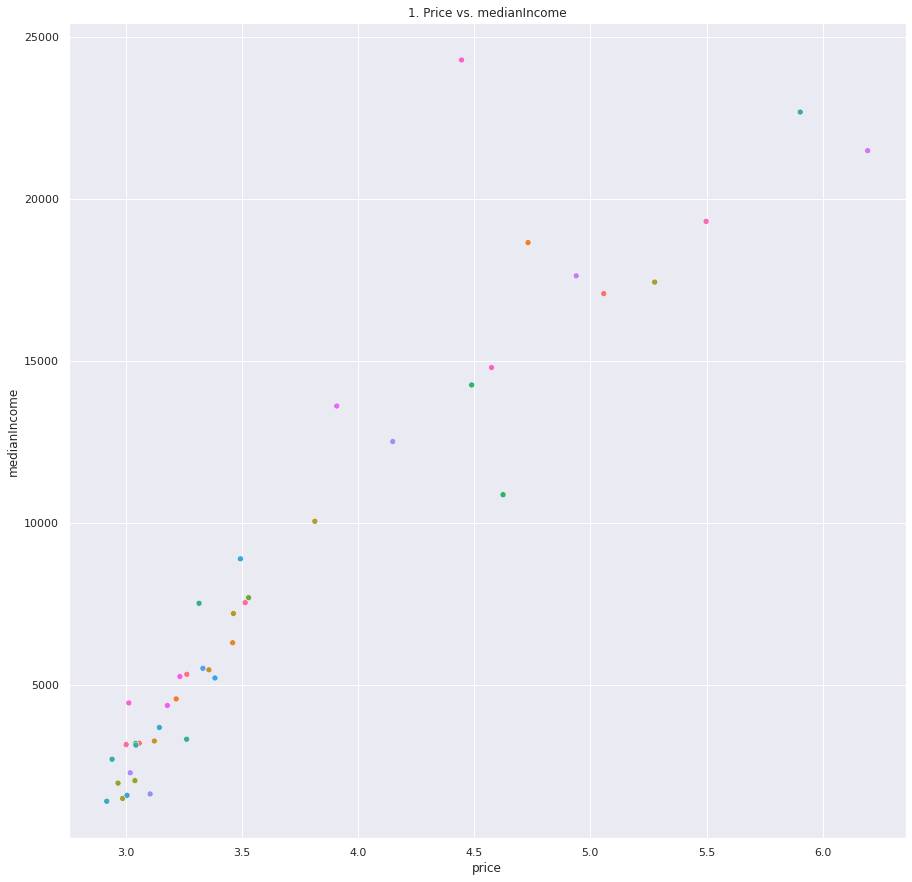

From this scatter plot we can see a fairly positive correlation between the two which supports our hypothesis that the big mac index can be used as a measure of economic status since median income is used as one of the metrics to measure economic status of different countries. We can see a few outliers but that’s to be expected since median income is not the sole metric to measure economic status.


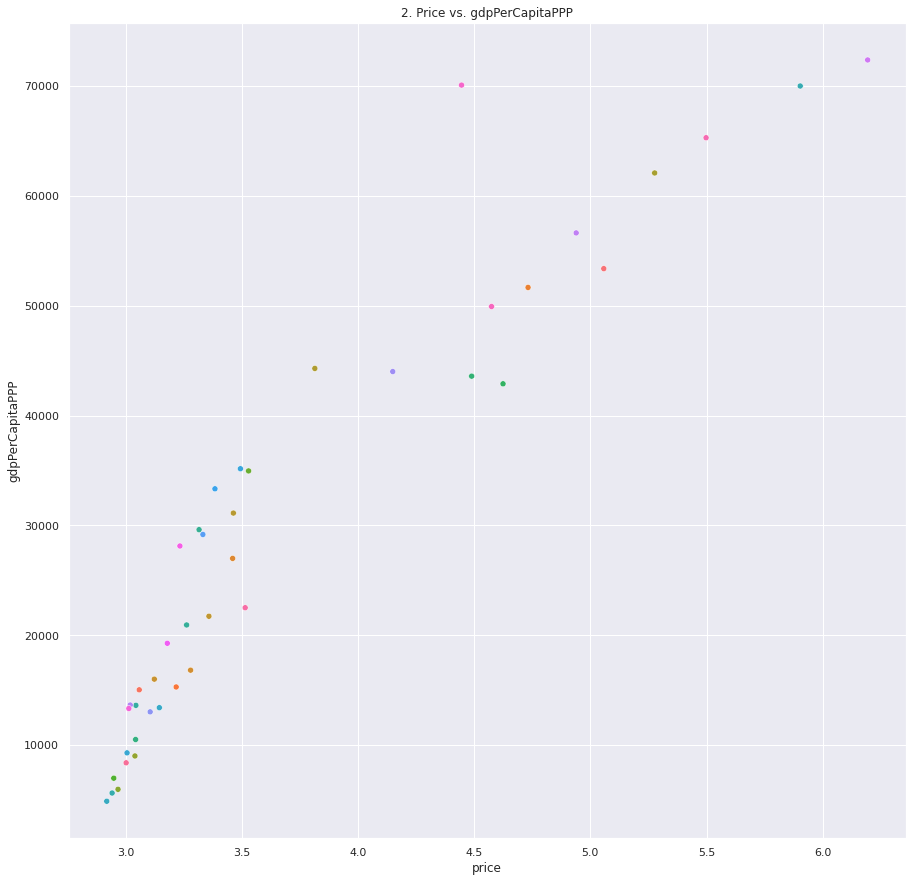

Reaffirming the interpretation from median income, even this scatter plot we see a fairly positive correlation between the two which supports our hypothesis that the big mac index can be used as a measure of economic status since GDP per capita PPP is used as one of the metrics to measure economic status of different countries. Subsequently we can also see some outliers such as the one at price ~4.5 matches the outlier found in Median Income clearly indicating that that point could be an edge case for this hypothesis.


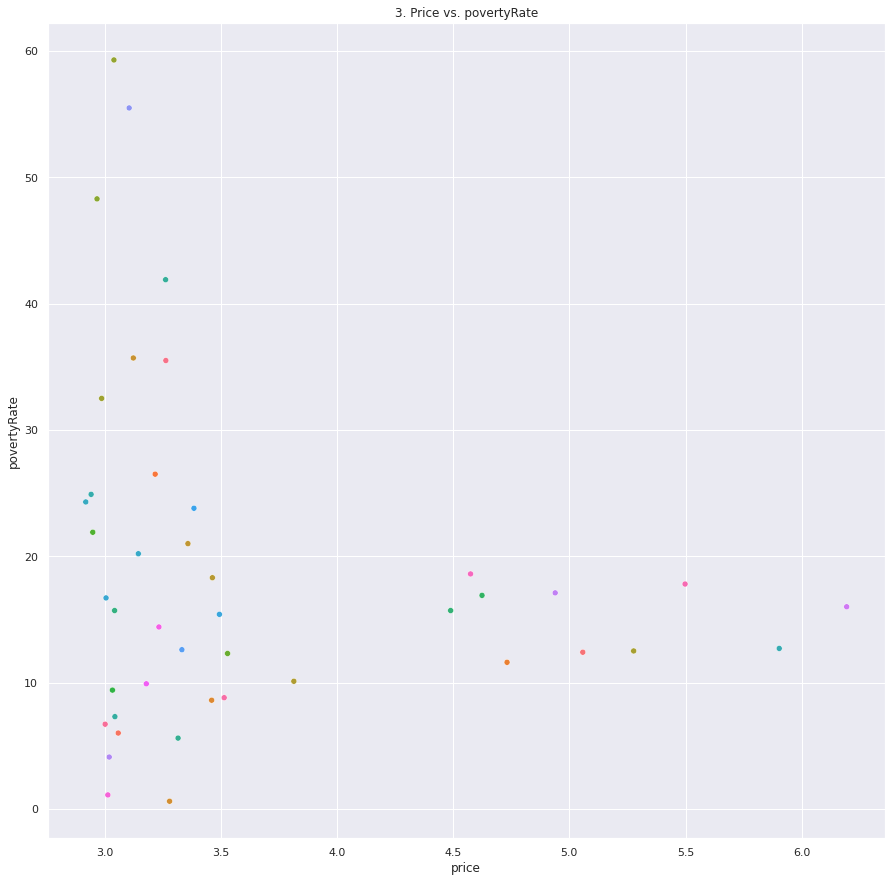

Unlike the previous scatter plots, this one seems fairly random and doesn’t have a clear positive correlation which also makes sense since poverty rate doesn’t have a positive correlation with the economic status of a country. On the other hand, it seems that it has an inverse relationship with economic status but the scatter plot doesn’t seem to show a good negative correlation between price and poverty rate.


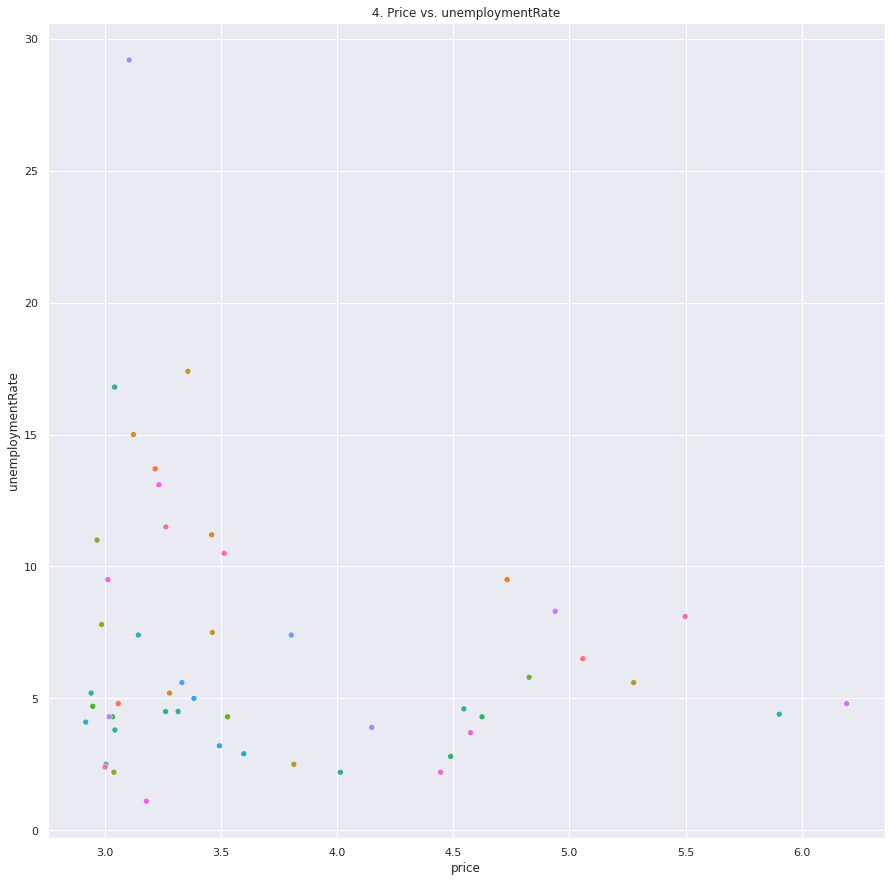

This scatter plot has a similar figure as the one for Poverty rate. This can be due to the fact that both of them have an inverse relationship with economic status and so this consistency does support our hypothesis as we can see slight negative correlation for both of these scatter plots!


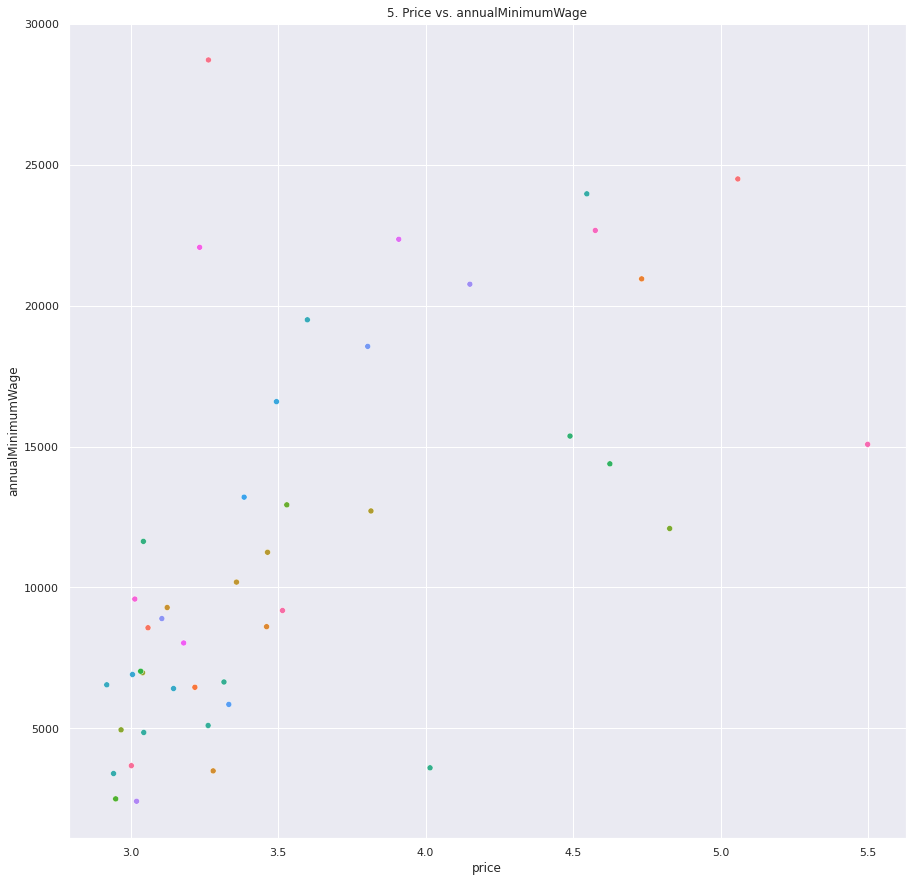

We can again see a positive correlation in the scatter plot for big mac price vs the annual wage however this seems to have more outliers than the previous positive scatter plots. A reason for this could be that since annual wages do have a correlation with economic status it doesn’t always hold true because countries with higher population seem to have lower hourly wages despite good economic status which could be the reason we see more outliers.


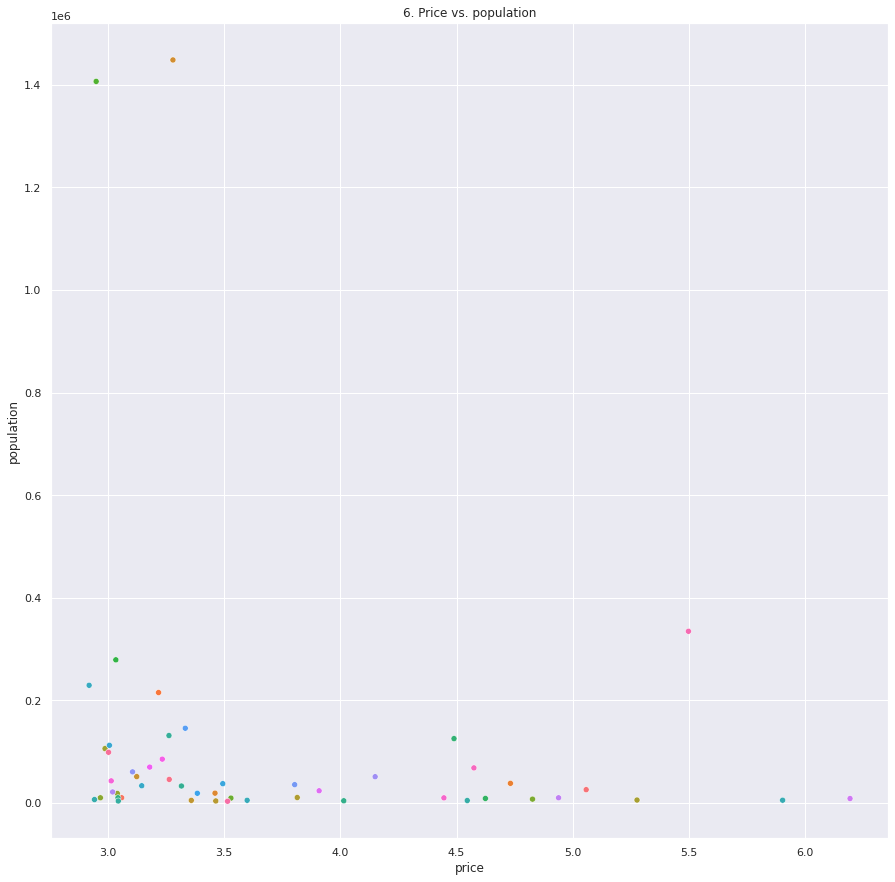

While population doesn’t necessarily serve as an indicator for economic status, it does mean that there would be more labor and higher demand for products. One thing to notice here is the graph seems vertically skewed since population is at a very large scale compared to big mac prices. We would likely want to normalize this for better analysis between both.


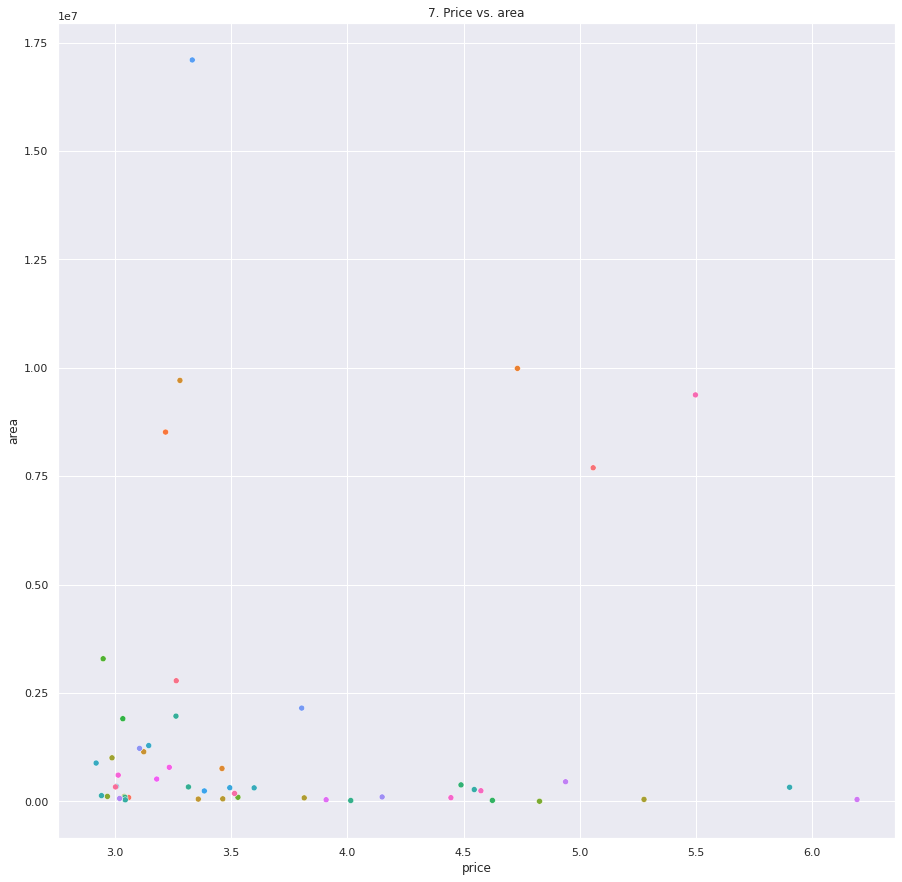

Similar to Price vs Population, we do see that even an area is on a large scale and needs to be normalized and also since both aren’t used as traditional metrics for economic status we don’t expect a positive correlation for them with price.


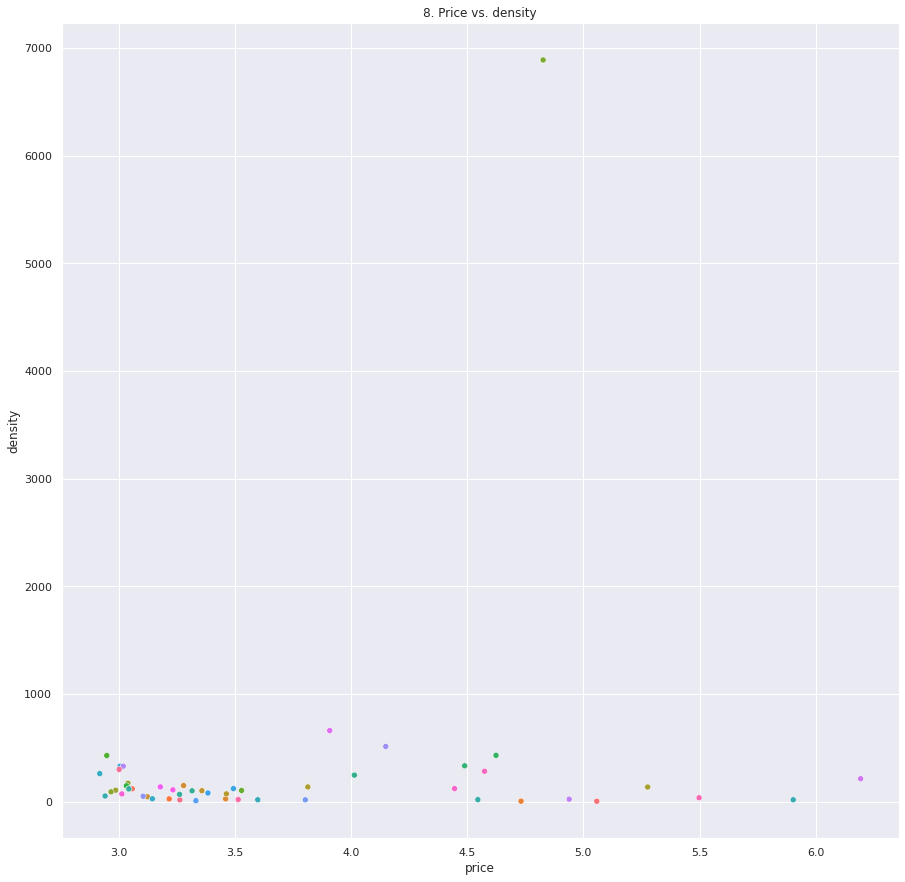

Since density is just population per area, we can see the scatter plot of Price vs Density relates to the scatter plots for population and area. However, one thing we notice is this has less outliers since combining both metrics we can see a better correlation.


In [36]:
sns.set(rc={'figure.figsize':(15,15)})
num = 0
arr = []
arr.append("""From this scatter plot we can see a fairly positive correlation between the two which supports our hypothesis that the big mac index can be used as a measure of economic status since median income is used as one of the metrics to measure economic status of different countries. We can see a few outliers but that’s to be expected since median income is not the sole metric to measure economic status.""")
arr.append("""Reaffirming the interpretation from median income, even this scatter plot we see a fairly positive correlation between the two which supports our hypothesis that the big mac index can be used as a measure of economic status since GDP per capita PPP is used as one of the metrics to measure economic status of different countries. Subsequently we can also see some outliers such as the one at price ~4.5 matches the outlier found in Median Income clearly indicating that that point could be an edge case for this hypothesis.""")
arr.append("""Unlike the previous scatter plots, this one seems fairly random and doesn’t have a clear positive correlation which also makes sense since poverty rate doesn’t have a positive correlation with the economic status of a country. On the other hand, it seems that it has an inverse relationship with economic status but the scatter plot doesn’t seem to show a good negative correlation between price and poverty rate.""")
arr.append("""This scatter plot has a similar figure as the one for Poverty rate. This can be due to the fact that both of them have an inverse relationship with economic status and so this consistency does support our hypothesis as we can see slight negative correlation for both of these scatter plots!""")
arr.append("""We can again see a positive correlation in the scatter plot for big mac price vs the annual wage however this seems to have more outliers than the previous positive scatter plots. A reason for this could be that since annual wages do have a correlation with economic status it doesn’t always hold true because countries with higher population seem to have lower hourly wages despite good economic status which could be the reason we see more outliers.""")
arr.append("""While population doesn’t necessarily serve as an indicator for economic status, it does mean that there would be more labor and higher demand for products. One thing to notice here is the graph seems vertically skewed since population is at a very large scale compared to big mac prices. We would likely want to normalize this for better analysis between both.""")
arr.append("""Similar to Price vs Population, we do see that even an area is on a large scale and needs to be normalized and also since both aren’t used as traditional metrics for economic status we don’t expect a positive correlation for them with price.""")
arr.append("""Since density is just population per area, we can see the scatter plot of Price vs Density relates to the scatter plots for population and area. However, one thing we notice is this has less outliers since combining both metrics we can see a better correlation.""")

for col in world_join.columns:
    if col == 'country' or col == 'price': continue
    num += 1
    ax = sns.scatterplot(x='price', y=col, data=world_join, hue="country", legend=False)
    ax.set(xlabel='price', ylabel=col, title=f'{num}. Price vs. {col}')
    plt.show()
    print(arr[num-1])

With scatterplots, we get a basic idea of which variables are better predictors. Running the OLS regression models below allows to get the specifc values of our regression lines.

In [41]:
narrative = ("A country can be expected to have an increased median income by $7030 for every dollar more the price of a Big Mac is. With a p-value of virtually zero, we can reject the null hypothesis that the price of a Big Mac has no effect on a country's median income. Looking at the adjusted R-squared value of 87.7%, we see that a large portion of the variance in median income can be explained by the price of a Big Mac. Therefore, Big Mac price can be a good predictor of median income.",
                "A country can be expected to have an increased GDP per capita by $21180 for every dollar more the price of a Big Mac is. With a p-value of virtually zero, we can reject the null hypothesis that the price of a Big Mac has no effect on a country's GDP per capita. Looking at the adjusted R-squared value of 87.7%, we see that a large portion of the variance in GDP per capita can be explained by the price of a Big Mac. Therefore, Big Mac price can be a good predictor of GDP per capita.",
                "A country can be expected to have a decreased poverty rate by 2.92% for every dollar more the price of a Big Mac is. With a p-value of .213, we fail to reject the null hypothesis that the price of a Big Mac has no effect on a country's poverty rate. Looking at the adjusted R-squared value of 1.4%, we see that only a very small portion of the variance in poverty rate can be explained by the price of a Big Mac. Therefore, Big Mac price is not a good predictor of poverty rate.",
                "A country can be expected to have a decreased unemployment rate by 1.08% for every dollar more the price of a Big Mac is. With a p-value of .203, we fail to reject the null hypothesis that the price of a Big Mac has no effect on a country's unemployment rate. Looking at the adjusted R-squared value of 1.3%, we see that only a very small portion of the variance in unemployment rate can be explained by the price of a Big Mac. Therefore, Big Mac price is not a good predictor of unemployment rate.",
                "A country can be expected to have an increased annual minimum wage by $6336 for every dollar more the price of a Big Mac is. With a p-value of virtually zero, we can reject the null hypothesis that the price of a Big Mac has no effect on a country's annual minimum wage. Looking at the adjusted R-squared value of 34.9%, we see that a small but sizable portion of the variance in annual minimum wage can be explained by the price of a Big Mac. Therefore, Big Mac price can be a good predictor of annual minimum wage.",
                "A country can be expected to have a decreased population by 54370 people for every dollar more the price of a Big Mac is. With a p-value of .245, we fail reject the null hypothesis that the price of a Big Mac has no effect on a country's population. Looking at the adjusted R-squared value of .8%, we see that only a very small portion of the variance in population can be explained by the price of a Big Mac. Therefore, Big Mac price is not a good predictor of population.",
                "A country can be expected to have an increased area by 317200 km^2 for every dollar more the price of a Big Mac is. With a p-value of .585, we fail reject the null hypothesis that the price of a Big Mac has no effect on a country's area. Looking at the adjusted R-squared value of -1.4%, we see that no portion of the variance in area can be explained by the price of a Big Mac. Therefore, Big Mac price is not a good predictor of area.",
                "A country can be expected to have an increased density by 205 people per km^2 for every dollar more the price of a Big Mac is. With a p-value of .201, we fail reject the null hypothesis that the price of a Big Mac has no effect on a country's density. Looking at the adjusted R-squared value of 1.3%, we see that only a very small portion of the variance in density can be explained by the price of a Big Mac. Therefore, Big Mac price is not a good predictor of density.")
i = 0
for col in world_join.columns:
    if col == 'country' or col == 'price': continue
    print('\n\n\n\n',col,'\n\n\n\n')
    dependent, predictors = patsy.dmatrices(f'{col} ~ price', world_join)
    model = sm.OLS(dependent, predictors)
    res = model.fit()
    print(res.summary())
    print(narrative[i])
    i += 1





 medianIncome 




                            OLS Regression Results                            
Dep. Variable:           medianIncome   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     300.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.78e-20
Time:                        12:28:08   Log-Likelihood:                -393.34
No. Observations:                  43   AIC:                             790.7
Df Residuals:                      41   BIC:                             794.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.784e+04   1550.

# Ethics & Privacy

To produce these datasets, our source would have to collect potentially private info about individual purchases at McDonalds worldwide such as purchase time and location that could serve to help identify individuals. Thankfully, all of our data sources exclude this information from us in the datasets, providing no way to connect to any individual given the data we see. Because of this there was no work that our group needed to do in order to preserve individual privacy.

Additionally, there are no ethical concerns with our project. We are simply exploring the relationship between Big Mac prices and a variety of economic indicators which does not put any one country at risk. All these aspects of each country’s economy are already public knowledge so we are not inadvertently revealing anything new.

To avoid bias in our research and to provide a more comprehensive report, we purposely examine multiple economic indicators and try to draw individual conclusions with them first before coming to an overall conclusion. This is done because we recognized that one factor cannot paint the whole picture and multiple others are needed for a more accurate image. Big Mac prices do not solely portray a country’s economy as a myriad of other things will have influence as well such as location, government, culture, etc.


# Conclusion & Discussion

By analyzing the correlation between the price of a Big Mac with a country's economic status, we found that Big Macs can be a predictor for certain aspects of a country's economic status. Through our exploratory data analysis (EDA), we can see that Big Mac prices have a positive relationship with median income, GDP per capita, and minumum wage but do not have a relationship with poverty rate, unemployment rate, population, area, or density. In our data analysis, we were able to support our findings in EDA through ordinary least squares (OLS) regressions with price as the independent variable. Resulting p-values were very close to zero for median income, GDP per capita, and minimum wage -- all being statistically significant at the 1% level. Similarly, poverty rate, unemployment rate, population, area, and density were not statistically significant. This implies that there is a strong correlation between the price of a Big Mac and a country's median income, GDP per capita, and minimum wage. Furthermore, the OLS regressions exhibited high adjusted R-squared values for median income and GDP per capita but a comparatively low adjusted R-squared value for minimum wage, meaning a large portion of the variance in median income and GDP per capita can be attributed to price but only a fraction of the variance in minimum wage can be attributed to price. This makes sense since, although median income and GDP per capita are almost solely based on economics, minimum wage can be affected by the government differently depending where a country's ruling party falls on the political spectrum. Thus, large variance in minimum wage can likely be attributed to outside factors and not the price of a Big Mac, which likely accounts for less but still relevant variance. Understanding our tests' p-values and R-squared values reinforces the support that the price of a Big Mac can be a predictor of economic status for a country's median income, GDP per capita, and minimum wage. This does not imply that McDonalds raising Big Mac prices will raise a country's median income, GDP per capita, and annual minimum wage but that Big Mac prices can be reflective of certain aspects of a country's economic status. Limitation for this project primarily lie in the availability of data. Only about 50 countries out of over 200 of the world were observed and not all countries had recent data, if at all, for all variables tested. An ideal dataset would have every country's most recent year's data to anaylze.

# Team Contributions

Adrian - Overview / Conclusion

Dawson - Background / Ethics

Gokul - Data Cleaning

Jenny - Analysis

Samay - EDA

These are the aspects we focused on. We all participated and helped out at all stages during the project.